<a href="https://colab.research.google.com/github/nazrana-nahreen/-Online-Exam-System/blob/main/Titanic_Survival_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


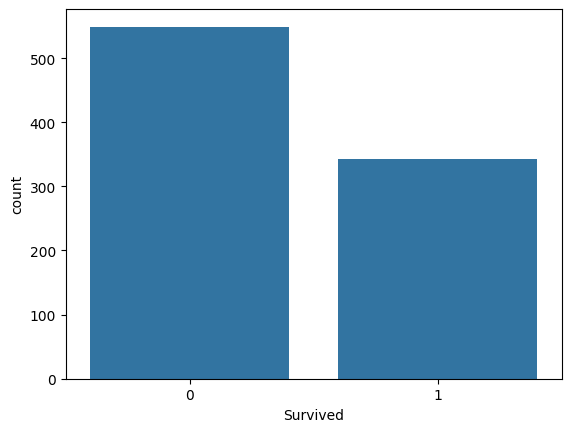

Validation Accuracy: 0.7988826815642458
Confusion Matrix:
 [[89 16]
 [20 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Submission file created!


/tmp/ipython-input-4269792584.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)
/tmp/ipython-input-4269792584.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [3]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load datasets
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head()

# Check missing values
print(train.isnull().sum())

# Visualize survival counts
sns.countplot(x="Survived", data=train)
plt.show()

# Fill missing values
train['Age'].fillna(train['Age'].median(), inplace=True)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)
test['Fare'].fillna(test['Fare'].median(), inplace=True)
test['Embarked'].fillna(test['Embarked'].mode()[0], inplace=True)

# Convert categorical columns to numeric
train['Sex'] = train['Sex'].map({'male':0, 'female':1})
train['Embarked'] = train['Embarked'].map({'S':0, 'C':1, 'Q':2})

test['Sex'] = test['Sex'].map({'male':0, 'female':1})
test['Embarked'] = test['Embarked'].map({'S':0, 'C':1, 'Q':2})

# Select features and target
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
X = train[features]
y = train["Survived"]

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Validate the model
y_pred = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))

# Prepare test data and predict
X_test = test[features]
predictions = model.predict(X_test)

# Create submission file
output = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Submission file created!")
